# 고령화비율
# 빈곤노인비율
# OECD

In [3]:
import platform
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

In [4]:
def from_iterable(iterables):
    # chain.from_iterable(['ABC', 'DEF']) --> ['A', 'B', 'C', 'D', 'E', 'F']
    for it in iterables:
        for element in it:
            yield element

#  데이터 전처리
>데이터프레임을 시리즈로 뽑아내기

In [5]:
df = pd.read_csv('pop.csv',encoding='utf-8')
df.head(10)

,가정별,"인구구조,부양비별",2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),총인구(명),"49,307,835","49,554,112","49,936,638","50,199,853","50,428,893","50,746,659","51,014,947","51,217,803","51,361,911","51,606,633"
1,NaN,남자(명),"24,774,341","24,881,114","25,069,867","25,187,380","25,285,319","25,445,077","25,585,894","25,670,949","25,736,793","25,863,502"
2,NaN,여자(명),"24,533,494","24,672,998","24,866,771","25,012,473","25,143,574","25,301,582","25,429,053","25,546,854","25,625,118","25,743,131"
3,NaN,성비(여자1백명당),101.0,100.8,100.8,100.7,100.6,100.6,100.6,100.5,100.4,100.5
4,NaN,인구성장률,0.51,0.50,0.77,0.53,0.46,0.63,0.53,0.40,0.28,0.48
5,NaN,인구(명): 0-14세,"8,229,264","7,979,439","7,771,460","7,577,231","7,392,237","7,213,693","7,029,883","6,864,563","6,724,283","6,589,388"
6,NaN,인구(명): 15-64세,"35,901,685","36,208,564","36,649,999","36,855,893","37,013,997","37,255,840","37,443,896","37,596,157","37,571,568","37,645,085"
7,NaN,인구(명): 65세 이상,"5,176,886","5,366,109","5,515,179","5,766,729","6,022,659","6,277,126","6,541,168","6,757,083","7,066,060","7,372,160"
8,NaN,- 구성비(%): 0-14세,16.7,16.1,15.6,15.1,14.7,14.2,13.8,13.4,13.1,12.8
9,NaN,- 구성비(%): 15-64세,72.8,73.1,73.4,73.4,73.4,73.4,73.4,73.4,73.2,72.9


In [6]:
#전체인구

In [7]:
pop = df.iloc[0,2:13]
pop = pd.DataFrame(pop)
pop

,0
2009,"49,307,835"
2010,"49,554,112"
2011,"49,936,638"
2012,"50,199,853"
2013,"50,428,893"
2014,"50,746,659"
2015,"51,014,947"
2016,"51,217,803"
2017,"51,361,911"
2018,"51,606,633"


In [8]:
popdata = pop.values.tolist()
popdata = list(itertools.chain.from_iterable(popdata))
popdata = [w.replace(',', '') for w in popdata]
popdata

['49307835',
 '49554112',
 '49936638',
 '50199853',
 '50428893',
 '50746659',
 '51014947',
 '51217803',
 '51361911',
 '51606633']

In [9]:
type(popdata[0])
popdata = [float(x) for x in popdata]
popdata

[49307835.0,
 49554112.0,
 49936638.0,
 50199853.0,
 50428893.0,
 50746659.0,
 51014947.0,
 51217803.0,
 51361911.0,
 51606633.0]

In [10]:
#고령인구

In [11]:
oldpop = df.iloc[7,2:13]
oldpop = pd.DataFrame(oldpop)
oldpop

,7
2009,"5,176,886"
2010,"5,366,109"
2011,"5,515,179"
2012,"5,766,729"
2013,"6,022,659"
2014,"6,277,126"
2015,"6,541,168"
2016,"6,757,083"
2017,"7,066,060"
2018,"7,372,160"


In [12]:
oldpopdata = oldpop.values.tolist()
oldpopdata = list(itertools.chain.from_iterable(oldpopdata))
oldpopdata = [w.replace(',', '') for w in oldpopdata]
oldpopdata

['5176886',
 '5366109',
 '5515179',
 '5766729',
 '6022659',
 '6277126',
 '6541168',
 '6757083',
 '7066060',
 '7372160']

In [13]:
type(oldpopdata[0])
oldpopdata = [float(x) for x in oldpopdata]
oldpopdata

[5176886.0,
 5366109.0,
 5515179.0,
 5766729.0,
 6022659.0,
 6277126.0,
 6541168.0,
 6757083.0,
 7066060.0,
 7372160.0]

In [14]:
7372160/51606633

0.14285295458047031

In [15]:
#그래프만들기

In [16]:
COLOR = 'cyan'
plt.rcParams["figure.figsize"] = [25,14]
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

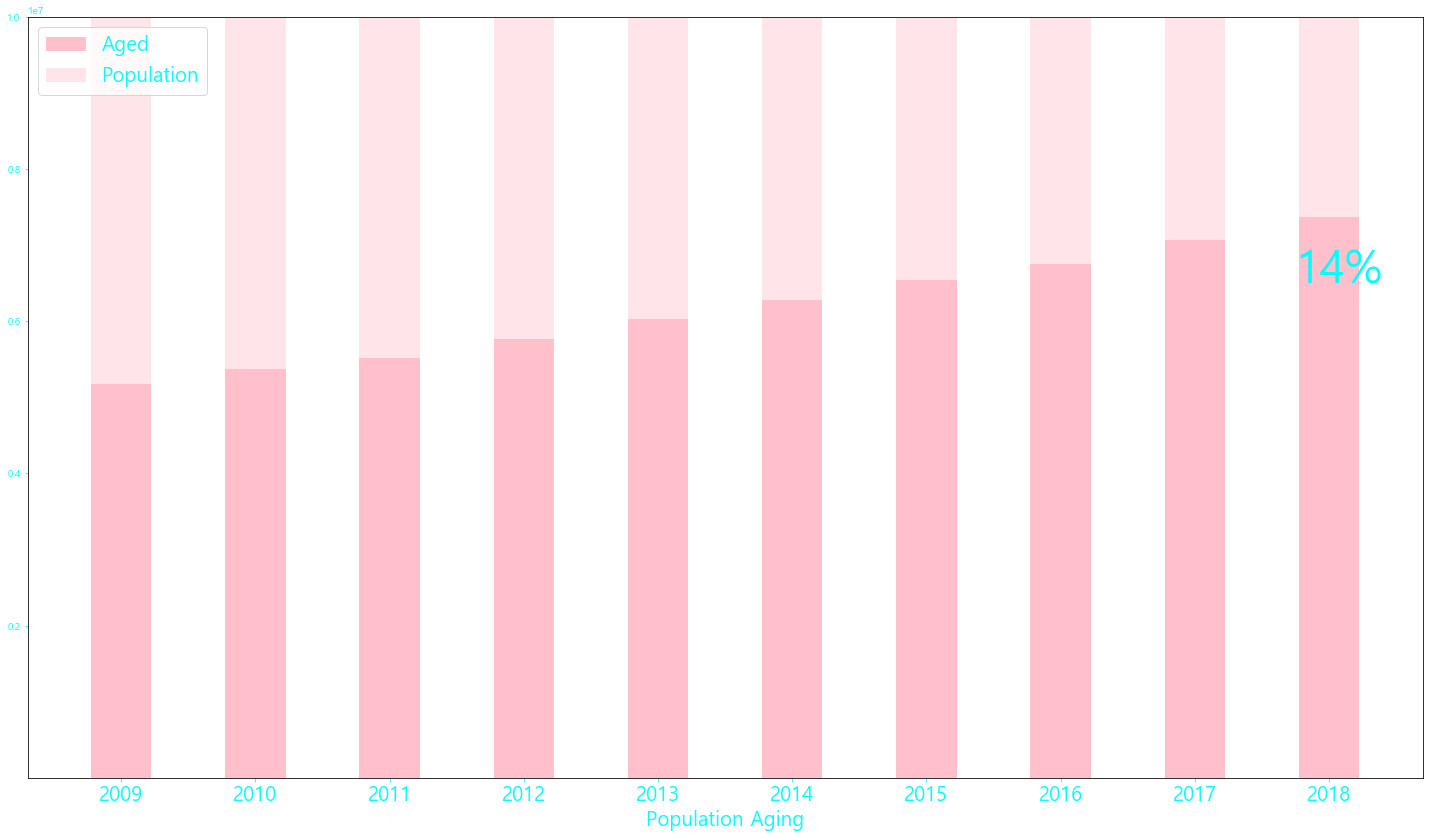

In [17]:
t = np.arange(0,10)
plt.figure(figsize=(25,14))
plt.bar(t,oldpopdata, color='pink', width=0.45 ,label='Aged')
plt.bar(t,popdata,    color='pink', alpha=0.4, width=0.45, label='Population')
plt.xlabel('Population Aging', fontsize=20)
plt.xticks(t, ('2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'), fontsize=20)
plt.text(8.75, 6500000, '14%', fontsize = 45)
plt.ylim(1, 10000000)
plt.legend(fontsize=20, loc = 'upper left')
plt.show()